# The MNIST Dataset
The MNIST database of handwritten digits, available from this page, has a training set of 60,000 examples, and a test set of 10,000 examples. It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image.

[MNIST Website](http://yann.lecun.com/exdb/mnist/)

[Convolutional Network Demo from 1993](https://youtu.be/FwFduRA_L6Q)

The dataset is included in the keras library. We will import the dataset, and apply different machine learning techniques to it.

# Loading and Preparing the Data

In [1]:
# Loading the MNIST dataset from Keras
from keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

Using TensorFlow backend.


In [2]:
# printing the shapes of the arrays
def printshapes(*arrays):
    [print(a.shape) for a in arrays]

printshapes(train_images, train_labels, test_images, test_labels)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


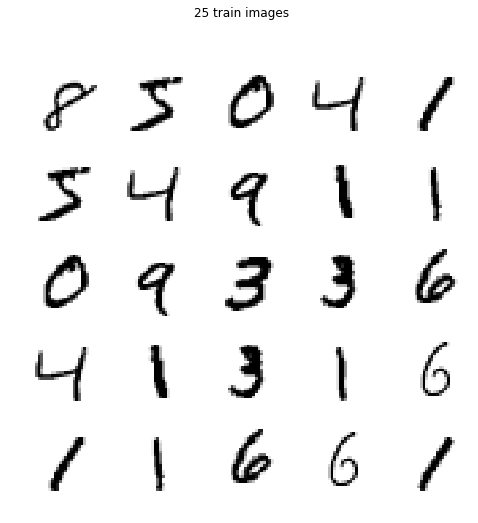

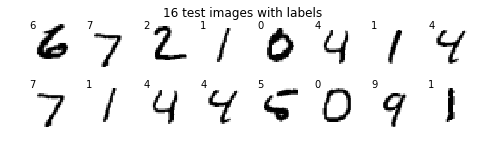

In [18]:
# create a function to plot a subset of the data along with labels, and predicted values (if available)

from matplotlib import pyplot as plt
import numpy as np

def plot_images(dataset, row=5, col=5, size=(8, 8), labels=None, predicted=None, title=None):
    fig, axes = plt.subplots(nrows=row, ncols=col, figsize=size)
    if title: fig.suptitle(title)
    for r in range(row):
        for c in range(col):
            index = (r+1)*(c+1)-2
            digit = dataset[index]
            # generate the plot for one image
            axes[r, c].imshow(digit, cmap=plt.cm.binary)
            axes[r, c].axis('off')
            # print the labels
            try: axes[r, c].text(1, 3, str(labels[index]))
            except: pass
            # print the predictions
            try: 
                if predicted[index] == labels[index]:
                    axes[r, c].text(1, 13, str(predicted[index]))
                else:
                    axes[r, c].text(1, 13, str(predicted[index]), color='r')
            except: pass
    return plt.show()

plot_images(train_images, title="25 train images")
plot_images(test_images, 2, 8, size=(8, 2), labels=test_labels, title="16 test images with labels")

In [4]:
# preparing the image data - converting the images to one dimentional arrays
X_train = train_images.reshape((60000, 28*28)).astype('float32') / 255
X_test = test_images.reshape((10000, 28*28)).astype('float32') / 255

# labels as numbers (for sklearn)
y_train = train_labels
y_test  = test_labels

# Fitting a Linear Regression Model

In [5]:
from sklearn.linear_model import LinearRegression
%time linear = LinearRegression().fit(X_train, y_train)
print(linear)

CPU times: user 2.42 s, sys: 228 ms, total: 2.65 s
Wall time: 1.59 s
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)


In [6]:
print("Linear Model")
print("acc. on training set:", linear.score(X_train, y_train))
print("acc. on testing set:", linear.score(X_test, y_test))

Linear Model
acc. on training set: 0.6161201011941511
acc. on testing set: 0.6242377587137731


In [7]:
predicted_linear = linear.predict(X_test)
print(predicted_linear)
predicted_linear = [int(n) for n in predicted_linear]
print(predicted_linear[0:10])

[6.3244724 2.311559  1.6171548 ... 7.9007688 5.5029273 5.761652 ]
[6, 2, 1, 0, 4, 1, 7, 5, 3, 8]


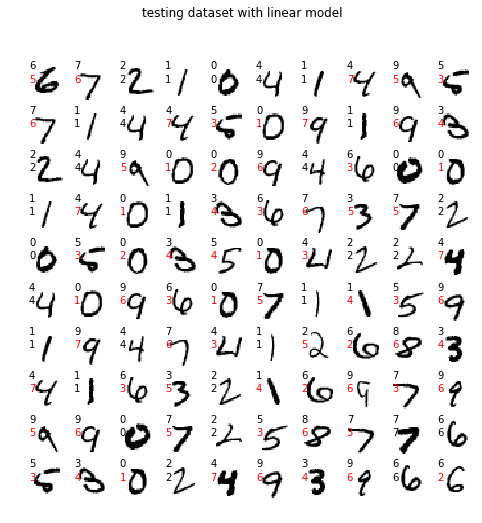

In [8]:
plot_images(test_images, 10, 10, labels=test_labels, predicted=predicted_linear, title="testing dataset with linear model")

# Fitting a Logistic Regression Model

In [23]:
from sklearn.linear_model import LogisticRegression

%time logistic = LogisticRegression(solver='lbfgs', multi_class='multinomial').fit(X_train, y_train)
print(logistic)

CPU times: user 16.7 s, sys: 756 ms, total: 17.4 s
Wall time: 17.4 s
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)


/home/bitnami/programs/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


In [22]:
print("Logistic Model")
print("acc. on training set:", logistic.score(X_train, y_train))
print("acc. on testing set:", logistic.score(X_test, y_test))

Logistic Model
acc. on training set: 0.9390333333333334
acc. on testing set: 0.9255


In [11]:
predicted_logistic = logistic.predict(X_test)
print(predicted_logistic)
predicted_logistic = [int(n) for n in predicted_logistic]
print(predicted_logistic[0:10])

[7 2 1 ... 4 5 6]
[7, 2, 1, 0, 4, 1, 4, 9, 6, 9]


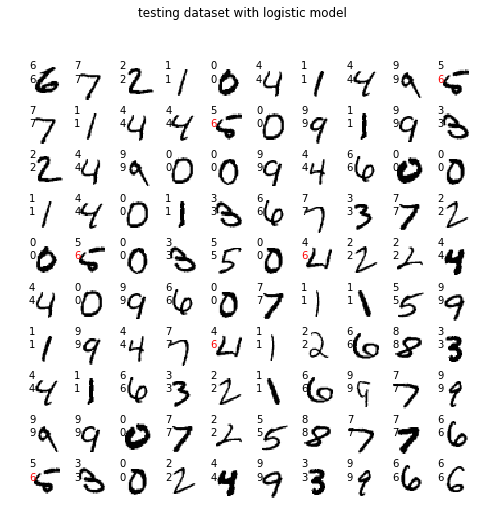

In [12]:
plot_images(test_images, 10, 10, labels=test_labels, predicted=predicted_logistic, title="testing dataset with logistic model")

# Fitting a Neural Network

In [13]:
# preparing the labels as arrays (for keras)
from keras.utils import to_categorical
Y_train = to_categorical(train_labels)
Y_test  = to_categorical(test_labels)

# the network architecture
from keras import models, layers
network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28*28,)))
network.add(layers.Dense(10, activation='softmax'))
# compile the network
network.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

Instructions for updating:
Colocations handled automatically by placer.


In [14]:
# train the network
%time network.fit(X_train, Y_train, epochs=5, batch_size=128)
print(network)

Instructions for updating:
Use tf.cast instead.
Epoch 1/5
60000/60000 [==============================] - 3s 51us/step - loss: 0.2544 - acc: 0.9263
Epoch 2/5
60000/60000 [==============================] - 3s 44us/step - loss: 0.1037 - acc: 0.9690
Epoch 3/5
60000/60000 [==============================] - 3s 43us/step - loss: 0.0678 - acc: 0.9798
Epoch 4/5
60000/60000 [==============================] - 3s 43us/step - loss: 0.0487 - acc: 0.9857
Epoch 5/5
60000/60000 [==============================] - 3s 42us/step - loss: 0.0373 - acc: 0.9888
CPU times: user 20.3 s, sys: 540 ms, total: 20.8 s
Wall time: 13.6 s


In [15]:
train_loss, train_acc = network.evaluate(X_train, Y_train)
test_loss, test_acc = network.evaluate(X_test, Y_test)

print("Neural Network")
print("acc. on training set:", train_acc)
print("acc. on testing set:", test_acc)

10000/10000 [==============================] - 0s 32us/step
Neural Network
acc. on training set: 0.9938833333333333
acc. on testing set: 0.9806


In [16]:
predicted_nn = network.predict(X_test)
predicted_nn = [np.argmax(arr) for arr in predicted_nn]
print(predicted_nn[0:10])

[7, 2, 1, 0, 4, 1, 4, 9, 5, 9]


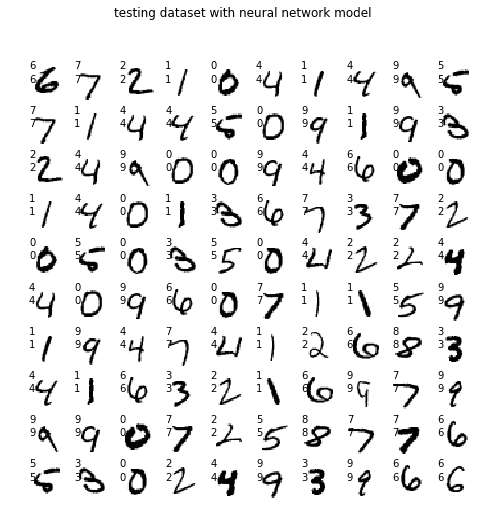

In [17]:
plot_images(test_images, 10, 10, labels=test_labels, predicted=predicted_nn, title="testing dataset with neural network model")

In [20]:
1

1